<a href="https://colab.research.google.com/github/starkjones/Food-Sales-Predictions-/blob/main/Food_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Food Sales-Prediction
### Week 1-5: Python for Data Science
Jonthan Jones 

In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [259]:
sales_data = '/content/drive/MyDrive/Colab Notebooks/Week 1/sales_predictions.csv'
df = pd.read_csv(sales_data)
df.head(10)

# Initial peek at data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [260]:
# Making a copy of the original dataframe for Machine Learning

df_ML = df.copy(deep=True)

# DATA EXPLORATION & DATA CLEANING 

In [261]:
# Further exploration of the imported data 
# identifying the dataframe's dimensions 

df.shape 

# (8523 rows, 12 columns)

(8523, 12)

In [262]:
# What are the datatypes of each variable?

df.info()
 # Index  Column Name                Non-Null Count  Dtype                     
 # 0      Item_Identifier            8523 non-null   object 
 # 1      Item_Weight                7060 non-null   float64
 # 2      Item_Fat_Content           8523 non-null   object 
 # 3      Item_Visibility            8523 non-null   float64
 # 4      Item_Type                  8523 non-null   object 
 # 5      Item_MRP                   8523 non-null   float64
 # 6      Outlet_Identifier          8523 non-null   object 
 # 7      Outlet_Establishment_Year  8523 non-null   int64  
 # 8      Outlet_Size                6113 non-null   object 
 # 9      Outlet_Location_Type       8523 non-null   object 
 # 10     Outlet_Type                8523 non-null   object 
 # 11     Item_Outlet_Sales          8523 non-null   float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [263]:
# Identification and removal of duplicated rows:

df.duplicated().sum()

# No duplicates present

0

In [264]:
# Identification of missing values:

df.isna().sum()

# Item Weight is missing 1463 values
# Outlet Size is missing 2410 values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [265]:
# Imputation of missing values:

# Item Weight (float64): 1463/8523 = 17% of values missing
# Outlet Size (object): 2410/8523 = 28% of values missing 

# Both columns are missing less than half of their data.  
# Missing data will be replaced for this instance. 

# The missing values in Item weight will be replaced with 
# the column's mean since its data type is float:

IW_mean = df['Item_Weight'].mean()
df['Item_Weight'].fillna(IW_mean, inplace=True)
df['Item_Weight'].value_counts()

# Missing Outlet Size data will be replaced with the most common entry:

df['Outlet_Size'].fillna("Medium", inplace=True)
df['Outlet_Size'].value_counts()


Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [266]:
 # Confirmation of imputed values:

df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [267]:
# Identification of inconsistent categories of data (example: fix cat, Cat, 
# and cats so that they are consistent) 

# Checking all columns with object datatypes:

dtypes = df.dtypes
str_columns = dtypes[dtypes=='object'].index
str_columns

for column in str_columns:
  print(f"Column Name = {column}")
  print()
  print(df[column].value_counts(dropna=False))
  print('\n\n')

Column Name = Item_Identifier

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64



Column Name = Item_Fat_Content

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64



Column Name = Item_Type

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64



Column Name = Outlet_Identifier

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT03

In [268]:
# From the datatype for-loop:

# The column: Item_Fat_Content contains what I assume are 3 
# different versions of "Low Fat", and two different versions of "Regular" 
# as seen below:

# Low Fat    5089
# Regular    2889
# LF          316
# reg         117
# low fat     112
# Name: Item_Fat_Content, dtype: int64

# Replacing the inconsistencies in Item_Fat_Content

df['Item_Fat_Content'].replace({"LF":"Low Fat", "low fat": "Low Fat", 
                                "reg": "Regular"}, inplace= True)
df["Item_Fat_Content"].value_counts()

# Value name/type inconsistencies in other columns:

# Item_Type = No inconsistencies 
# Outlet_Identifier = No inconsistencies
# Outlet_Size = No inconsistencies
# Outlet_Location_Type = No inconsistencies
# Outlet_Type = No inconsistencies

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [269]:
# By defualt,
# any column not printed by the for loop above must have a numeric data type

# Printing a summary of statistics for all numeric columns

df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### With duplicates, inconsistencies, missing values, and anomalies removed the data can now be used for visual analysis.

# VISUAL ANALYSIS

In [270]:
# Our goal is to help the retailer understand the properties of the products and 
# outlets that play a significant role in increasing sales.

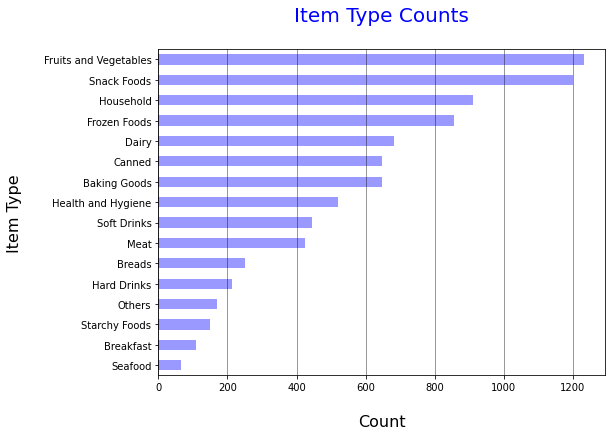

In [271]:
groceries = df['Item_Type'].value_counts().sort_values(ascending=True)

groceries.plot(kind='barh', alpha = .4, color='blue', figsize= (8,6), );
plt.title('Item Type Counts\n', color= 'blue', fontsize =20)
plt.xlabel('\nCount', fontsize = 16)
plt.ylabel('Item Type\n', fontsize = 16)
plt.grid(axis ='x', color ='black', alpha=.5)
plt.show()

# Analysis: 
# The Fruits and Vegetables category has the highest count of all item types, 
# followed by snack foods and household items. Seafood has the lowest count 
# followed by Breakfast items. 

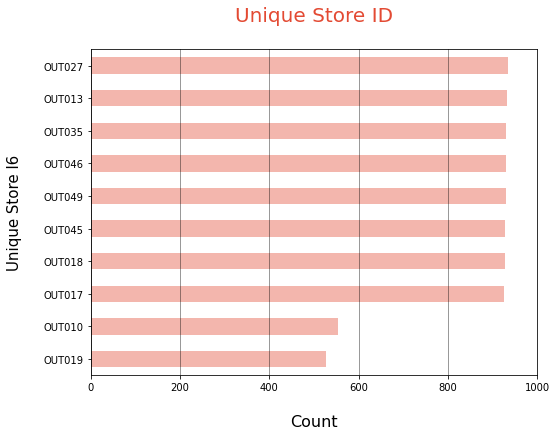

In [272]:
groceries = df['Outlet_Identifier'].value_counts().sort_values(ascending=True)

groceries.plot(kind='barh', alpha = .4, color='#e34a33', figsize= (8,6), );
plt.title('Unique Store ID\n', color= '#e34a33', fontsize =20)
plt.xlabel('\nCount', fontsize = 16)
plt.xlim(0,1000, )
plt.ylabel('Unique Store I6\n', fontsize = 15)
plt.grid(axis ='x', color ='black', alpha=.5)
plt.show()

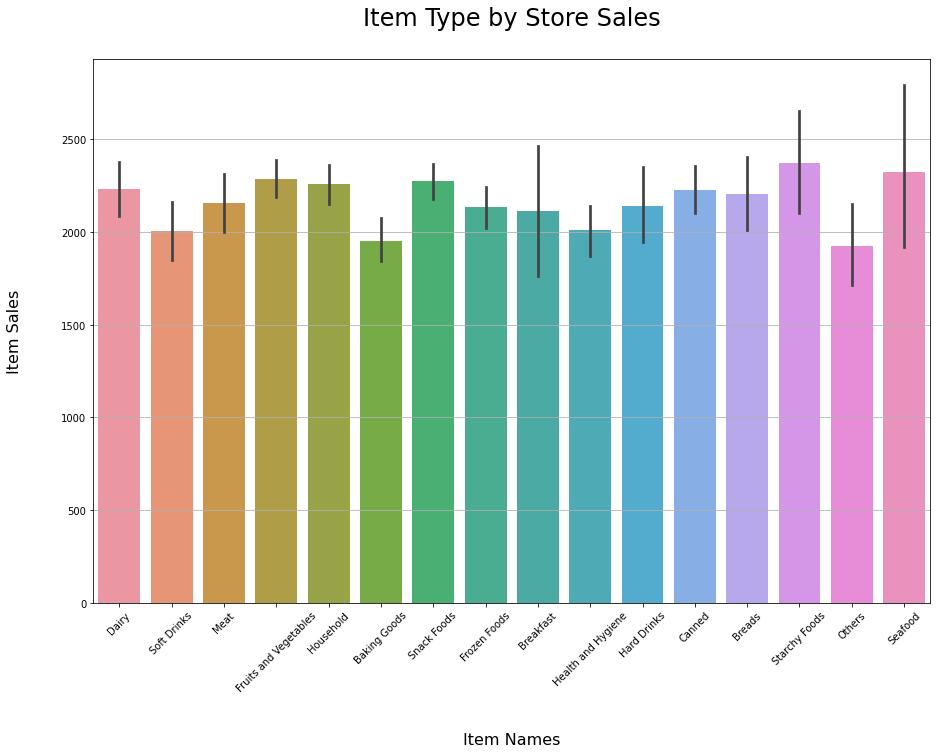

In [273]:
fig, bp = plt.subplots(nrows=1, ncols =1, figsize= (15,10))
bp = sns.barplot(data=df, x= 'Item_Type', y = 'Item_Outlet_Sales');
plt.title('Item Type by Store Sales\n', fontsize =24)
plt.ylabel('Item Sales\n\n', fontsize=16);
plt.xlabel('\n\nItem Names', fontsize=16);
plt.grid(axis='y')
plt.xticks(rotation=45);

# Analysis:
# Despite the significant differences in item counts between categories with the 
# highest counts like Fruits & Vegetables and categories with the lowest counts 
# like Seafood, the sales for each item class appear to be relatively close in 
# volume. An increase in the quantity of Seafood, Breakfast items, and Starchy 
# foods would result in a significant increase in total revenue since each of 
# these three categories has quantities less than 15% of the two categories with 
# the highest item counts. 

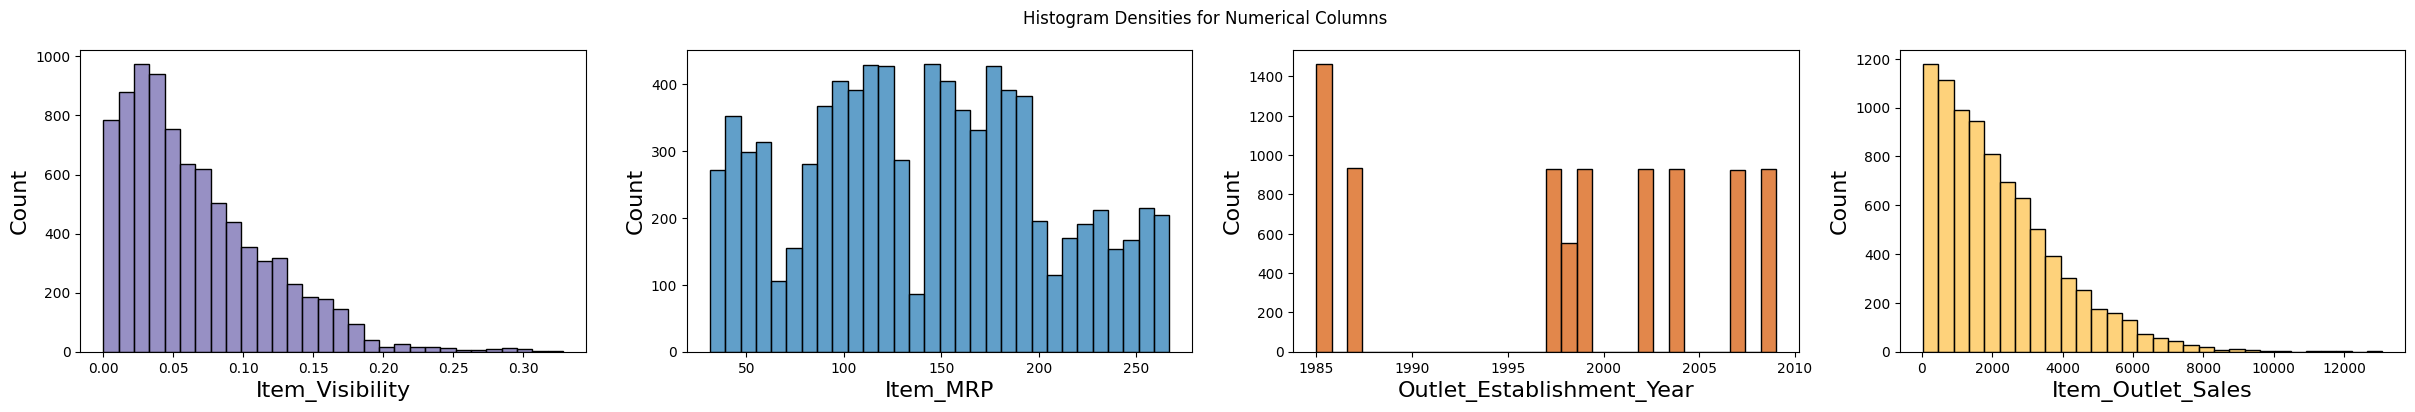

In [274]:
# Histogram to view the distributions of various features in your dataset. 

IV = df['Item_Visibility']         
IMRP = df['Item_MRP']                   
OEY = df['Outlet_Establishment_Year']  
IOS = df['Item_Outlet_Sales']         

fig, axes = plt.subplots(1, 4,figsize=(30,4), sharey=False, dpi=100);
plt.suptitle('Histogram Densities for Numerical Columns')
sns.histplot(IV, bins=30, color="#756bb1", ax=axes[0], 
             legend=True, linestyle='solid', line_kws={'lw': 2, 'color': 'black'});
sns.histplot(IMRP, bins=30, color="#2c7fb8", ax=axes[1], 
             legend=True, linestyle='-', line_kws={'lw': 2, 'color': 'black'});
sns.histplot(OEY, bins=30, color="#d95f0e", ax=axes[2], 
             legend=True, linestyle='-', line_kws={'lw': 2, 'color': 'black'});
sns.histplot(IOS, bins=30, color="#fec44f", ax=axes[3], 
             legend=True, linestyle='-', line_kws={'lw': 2, 'color': 'black'});

# Analysis 

# Item Visibility: Item Visibility counts are highest with scores close to zero 
# and linearly decline as the scores increase.

# Item MRP: Maximum Retail Price has a pseudo symmetrical 
# distribution that appears to be mirrored about the axis x = 140 axis. 
# The majority of items are clustered in the MRP range 
# spanning 100.00 to 200.00 dollars. 

# Outlet Establishment Year: Store establishment was high in the late 80s with 
# the creation of roughly 2400 new stores from 1985 to 1988. Store establishment 
# was non-existent from the early to mid-90s however, before tapering off at 800 
# or so stores every few years from the late 90s to early 2000s. 
# With the exception of ~1987 – 1997 stores establishment appears to be 
# consistent # every few years. The absence of store production in the early 90s 
# may be the product of fiscal policy, market competition, market consolidation, 
# and/or several other factors. 

# Item Outlet Sales: The majority of sales of a particular product in various 
# stores range from a few dollars to roughly 13000.00 dollars. Most of the sales 
# occur around 2000.00 dollars.

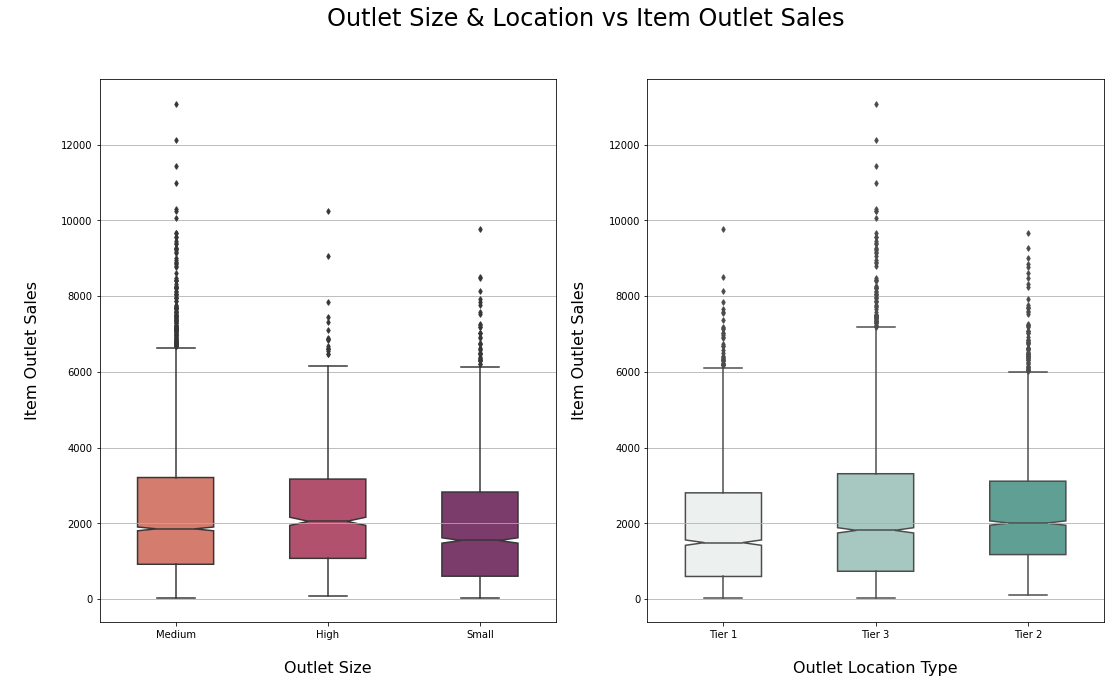

In [275]:
# Boxplot to view statistical summaries of various features in your dataset.
fig, axes = plt.subplots(nrows=1, ncols =2, figsize= (18,10))
plt.suptitle('Outlet Size & Location vs Item Outlet Sales', fontsize=24)
axes[0].grid()
axes[1].grid()
plt.rcParams["axes.labelsize"] = 16
sns.boxplot(data= df, x='Outlet_Size', y='Item_Outlet_Sales', ax=axes[0], palette='flare', fliersize=4, notch=True, width =.5).set(xlabel = '\nOutlet Size', ylabel='\nItem Outlet Sales\n');
sns.boxplot(data= df, x='Outlet_Location_Type', y='Item_Outlet_Sales', ax=axes[1], palette="light:#5A9", fliersize=4, notch=True, width =.5).set(xlabel = '\nOutlet Location Type', ylabel='\n\nItem Outlet Sales\n');

# Interpretation
# Graph 1: 
# Medium store sizes buy the most items and have a higher upper quartile, maximum, and average than the High and Small outlet sizes. 
# High outlets have the highest average buys and a slightly higher upper quartile over the Small outlets, although their maximums appear to be equivalent. 
# Smaller outlets have the second highest number of outliers beyond their maximum purchases. 

# Medium Stores have the highest number of purchases and the largest by far. 

# Graph 2:
# Tier 3 location stores have the largest number of purchases and the highest purchase orders. 

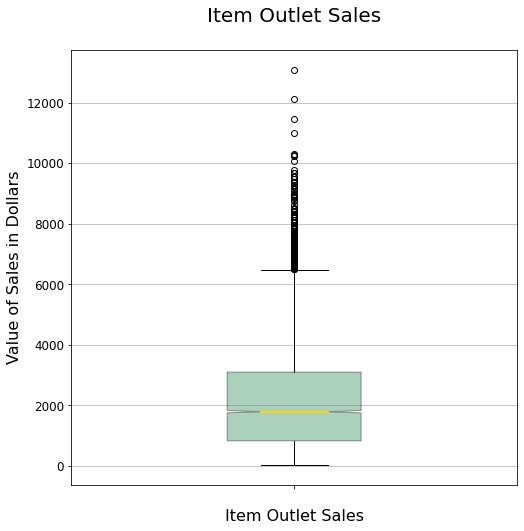

In [276]:
fig, bp = plt.subplots(nrows =1, ncols =1, figsize = (8,8))

bp.boxplot([df['Item_Outlet_Sales'], ], notch = True, labels=[' '],
                        widths= .3, 
                        patch_artist=True, 
                        medianprops=dict(linestyle='-', linewidth =2, color='gold'), 
                        boxprops=dict(linestyle='--', color='Black', facecolor='seagreen', alpha=.4));
bp.set_title('Item Outlet Sales\n', fontsize = 20);
plt.xlabel('Item Outlet Sales', fontsize=16)
plt.ylabel('Value of Sales in Dollars', fontsize = 16);
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);
plt.grid(axis='y',c = '#756bb1', alpha = .5)

# Interpretation:
# Mean outlet sales are estimated to be around $2000.00 with a 95% confidence 
# interval.The majority of sales are within the range of  $1000.00-$3000.00 with 
# max sales above $6000.00 and several outliers that span 6200.00 to 13,000.00 dollars. 

In [277]:
# Heatmap of the correlation between features.
correlation = df.corr()
correlation

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


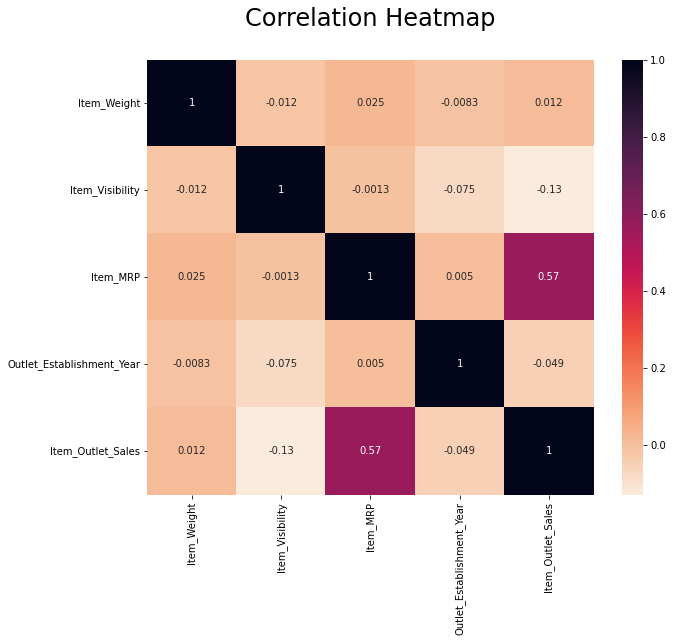

In [278]:
fig, hm = plt.subplots(nrows=1, ncols =1, figsize=(10,8));
hm = sns.heatmap(correlation, cmap='rocket_r', annot=True);
hm.set_title('Correlation Heatmap\n', fontsize= 24);

# Analysis: Max Retail Price and Item Outlet Sales have the highest  positive 
# correlation and Item Visibility and Item Outlet Sales have the strongest negative correlation.

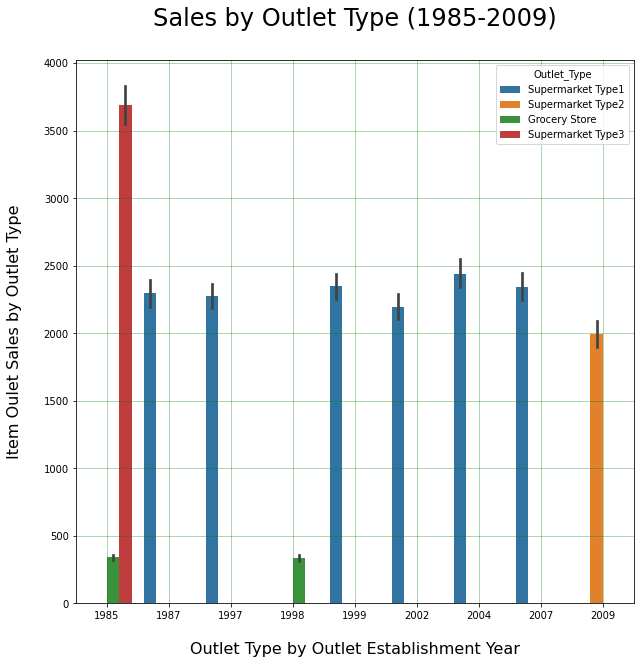

In [279]:
# For Part 4, your task is to build several data visualizations to help your 
# stakeholders better understand trends in the data. 
# Feel free to get creative with this week - this is your chance to set your 
# project apart from others with exceptional visualizations and analyses.

# Build on your previous cleaning, exploration, and analysis.  
# Create a minimum of two data visualizations that help others understand 
# trends in the data (explanatory data analysis).
# Since these graphs are for reporting purposes, 
#make sure they look nice by including titles, legends, etc.

fig, bar = plt.subplots(nrows=1, ncols =1, figsize=(10,10));
bar = sns.barplot(data=df, x = df["Outlet_Establishment_Year"], y = df['Item_Outlet_Sales'], hue= df['Outlet_Type']);
bar.set_title('Sales by Outlet Type (1985-2009)\n', fontsize =24);
plt.xlabel('\nOutlet Type by Outlet Establishment Year', fontsize= 16);
plt.ylabel('Item Oulet Sales by Outlet Type\n', fontsize=16);
plt.grid(c ='green', alpha=.4, linestyle='-')

# Analysis:

# It appears that sales were no longer made to Supermarket Type 3 after 1986-1987: 
# These types of stores may have gone out of business, or they are no longer clients. 
# Supermarket Type 2 stores were established in 2008 and /or they have become new clients in that year. 
# Sales to Grocery Stores were conducted in 1986 and 1999 only. 
#Supermarket Type 1 has been the most consistent buyer throughout the decades. 

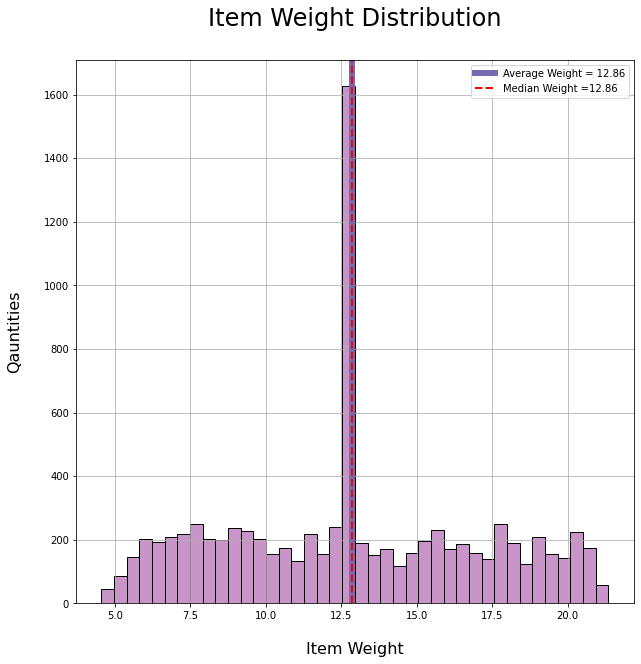

In [280]:
IW_mean = df["Item_Weight"].mean()
IW_median = df["Item_Weight"].median()

ax = df['Item_Weight'].hist(bins=40, color=["#c994c7"], edgecolor="black", figsize=[10,10], );
ax.axvline(IW_mean, color='#756bb1', ls='solid', lw=6, label= f"Average Weight = {round(IW_mean, 2)}")
ax.axvline(IW_median, color="red", ls='--', lw= 2, label= f"Median Weight ={IW_median:,.2f}");
ax.legend();
plt.xlabel("\nItem Weight", fontsize=16);
plt.ylabel("Qauntities\n", fontsize=16);

plt.title("Item Weight Distribution\n", fontsize = 24);
plt.show()

# Analysis: We can see from the histogram that the quantity of items at most of 
# the given weights is close to 200 with the exception of the items that weigh 
# 12.8 pound items. The average and median weights are equivalent at 12.86 pounds, 
# and they have a sinificantly higher quantity count than the other items. 

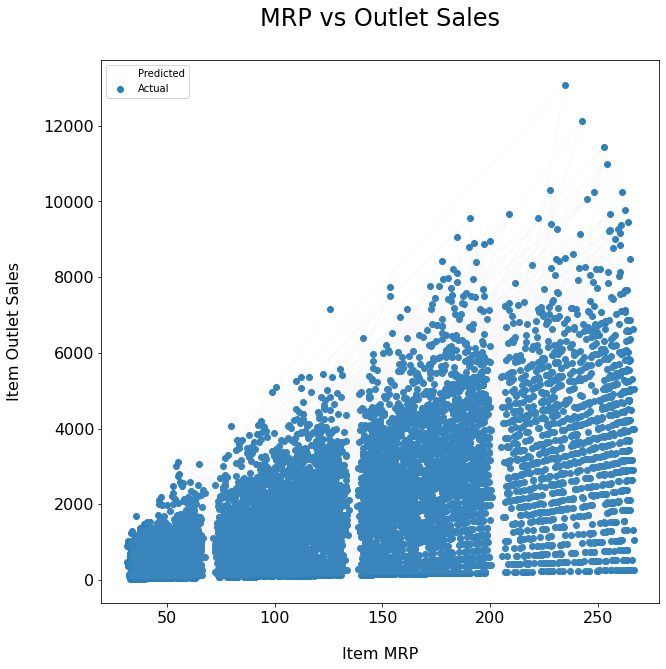

In [281]:
from IPython.core.pylabtools import figsize
fig, axes = plt.subplots(nrows=1, ncols =1, figsize=(10,10));
axes.scatter(df['Item_MRP'],df['Item_Outlet_Sales'], c='#2c7fb8',lw=1, label='Actual')
axes.plot(df['Item_MRP'],df['Item_Outlet_Sales'], c='#bcbddc',lw=1, alpha=.1, label='Predicted');
plt.title("MRP vs Outlet Sales\n", fontsize=24);

plt.legend(loc="upper left")
plt.xlabel('\nItem MRP', fontsize=16);
plt.ylabel('Item Outlet Sales\n', fontsize=16);
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);

# Interpretation: This scatter plot supports our findings from the heat mat above:
# Item MRP and Item Outlet Sales are positively correlated. There is a linear 
# relationship between the two: as MRP increases Outlet Sales also increase.  

#MACHINE LEARNING DATA PREPARATION 

In [282]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(display='diagram')

# The immmutable copy of the orginal Data Frame from code block 7 above will be 
# used for Machine Learning

df_ML.shape

# it has the same shape as the original set. 

(8523, 12)

In [283]:
df_ML.isna().sum()
print('\n\n')

df_ML.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [284]:
# Removing insignificant columns from the data frame

remove = ['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year']

df_ML.drop(columns=remove, inplace=True)

In [304]:
df_ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           7060 non-null   float64
 1   Item_Fat_Content      8523 non-null   object 
 2   Item_Visibility       8523 non-null   float64
 3   Item_Type             8523 non-null   object 
 4   Item_MRP              8523 non-null   float64
 5   Outlet_Size           6113 non-null   object 
 6   Outlet_Location_Type  8523 non-null   object 
 7   Outlet_Type           8523 non-null   object 
 8   Item_Outlet_Sales     8523 non-null   float64
dtypes: float64(4), object(5)
memory usage: 599.4+ KB


In [285]:
df_ML['Item_Fat_Content'].replace({'reg': 'Regular', 'LF': 'Low Fat', 
                                   'low fat': 'Low Fat'}, inplace=True)

In [286]:
# Identifying the target (y) and features (X): 
# "Item_Outlet_Sales" is the target of our model
# The rest of the relevant variables will serve as the features matrix.  

y= df_ML['Item_Outlet_Sales']
X= df_ML.drop(columns=['Item_Outlet_Sales'])

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [287]:
# Selectors 

cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

cat_selector(X_train)

 # Column Name			      Feature Type
 # Item Fat Content		    ordinal
 # Item Type			        nominal
 # Outlet Size			      nominal
 # Outlet Location Type	  nominal	
 # Outlet Type			      nominal


['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [288]:
# Ordinal Encoder

fat_content_label = ['Regular', 'Low Fat']
outlet_size_label = ['Small', 'Medium', 'High']

ordered_labels = (fat_content_label, outlet_size_label)

ordered_labels

# Ordinal Enconder

Ordinal_Encoder = OrdinalEncoder(categories=ordered_labels)
Ordinal_Encoder

OrdinalEncoder(categories=(['Regular', 'Low Fat'], ['Small', 'Medium', 'High']))

In [289]:
# Scalars and OHE

# Numeric Scaler

Scaler_Num = StandardScaler()

# Ordinal Scaler

Scaler_Ord = StandardScaler()

# One Hot Encoder
OHE = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [290]:
# Instantiate Transformers

# Imputers

ordinal_imputer = SimpleImputer(strategy='constant', fill_value='Missing')
freq_imputer= SimpleImputer(strategy='most_frequent')
mean_imputer= SimpleImputer(strategy='mean')

In [291]:
# Creating Pipelines

ordinal_PL = make_pipeline(freq_imputer, Ordinal_Encoder, Scaler_Ord)
nominal_PL = make_pipeline(freq_imputer, OHE)
numeric_PL = make_pipeline(mean_imputer, Scaler_Num)

In [292]:
# Creating Tuples for Pipeline Pairing 

# Columns

ordinal_columns = ['Item_Fat_Content', 'Outlet_Size']
nominal_columns = ['Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

# Tuples

ordinal_tuple = (ordinal_PL, ordinal_columns)
nominal_tuple = (nominal_PL, nominal_columns)
numeric_tuple = (numeric_PL, num_selector)

In [293]:
# Column Transformer and fit on Training Data

preprocessor = make_column_transformer(ordinal_tuple, nominal_tuple, numeric_tuple, remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=(['Regular',
                                                                              'Low '
                                                                              'Fat'],
                                                                             ['Small',
                                                                              'Medium',
                                                                              'High']))),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Item_Fat_Content', 'Outlet_Size']),
                                ('pipeline-2',
                                 Pipeline(steps=[('sim...
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Item_Type', 'Outlet_Size',
                                  'Outlet_Location_Type', 'Outlet_Type']),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f7dc21de810>)])

In [310]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=(['Regular',
                                                                              'Low '
                                                                              'Fat'],
                                                                             ['Small',
                                                                              'Medium',
                                                                              'High']))),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Item_Fat_Content', 'Outlet_Size']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Item_Type', 'Outlet_Size',
                                  'Outlet_Location_Type', 'Outlet_Type']),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f7dc21de810>)])

In [295]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

X_train_processed

array([[ 0.7403206 ,  0.28737371,  0.        , ...,  0.81724868,
        -0.71277507,  1.82810922],
       [-1.35076614,  0.28737371,  0.        , ...,  0.5563395 ,
        -1.29105225,  0.60336888],
       [-1.35076614,  0.28737371,  0.        , ..., -0.13151196,
         1.81331864,  0.24454056],
       ...,
       [ 0.7403206 ,  0.28737371,  0.        , ...,  1.11373638,
        -0.92052713,  1.52302674],
       [ 0.7403206 ,  0.28737371,  0.        , ...,  1.76600931,
        -0.2277552 , -0.38377708],
       [ 0.7403206 , -1.38404828,  0.        , ...,  0.81724868,
        -0.95867683, -0.73836105]])

In [296]:
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 31)




array([[ 0.7403206 ,  0.28737371,  0.        , ...,  0.81724868,
        -0.71277507,  1.82810922],
       [-1.35076614,  0.28737371,  0.        , ...,  0.5563395 ,
        -1.29105225,  0.60336888],
       [-1.35076614,  0.28737371,  0.        , ..., -0.13151196,
         1.81331864,  0.24454056],
       ...,
       [ 0.7403206 ,  0.28737371,  0.        , ...,  1.11373638,
        -0.92052713,  1.52302674],
       [ 0.7403206 ,  0.28737371,  0.        , ...,  1.76600931,
        -0.2277552 , -0.38377708],
       [ 0.7403206 , -1.38404828,  0.        , ...,  0.81724868,
        -0.95867683, -0.73836105]])

#MODELING

## LINEAR REGRESSION

In [297]:
# Build a linear regression model.

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyRegressor

In [316]:
def model_metrics(y_true, y_pred):
  """yields / prints MAE, MSE, RMSE and R2 from target prediction"""
  
  MAE = mean_absolute_error(y_true, y_pred)
  MSE = mean_squared_error(y_true, y_pred)
  RMSE = np.sqrt(MSE)
  R2 = r2_score(y_true, y_pred)

  print(f'SCORES:\n \nMAE: {MAE:,.2f} \nMSE: {MSE:,.2f} \nRMSE: {RMSE:,.2f} \nR2: {R2:.2f}\n')

In [311]:
# Basline Dummy regressor with mean strategy; a reference for our model's performance

DR = DummyRegressor(strategy='mean')

DR_pipe = make_pipeline(preprocessor, DR)
DR_pipe.fit(X_train, y_train)

train_prediction = DR_pipe.predict(X_train)
test_prediction = DR_pipe.predict(X_test)

model_metrics(y_train, train_prediction)
model_metrics(y_test, test_prediction)

SCORES:
 
MAE: 1,360.22 
MSE: 2,959,455.70 
RMSE: 1,720.31 
R2: 0.00

SCORES:
 
MAE: 1,326.12 
MSE: 2,772,144.46 
RMSE: 1,664.98 
R2: -0.00



In [312]:
LR_PL = make_pipeline(preprocessor, LinearRegression())
LR_PL.fit(X_train, y_train)

LR_PL.score(X_train, y_train)

0.5606094757557138

In [318]:
LRtrain_predicted = LR_PL.predict(X_train)
LRtest_predicted = LR_PL.predict(X_test)

model_metrics(y_train, LRtrain_predicted)
model_metrics(y_test, LRtest_predicted)

SCORES:
 
MAE: 847.31 
MSE: 1,300,356.79 
RMSE: 1,140.33 
R2: 0.56

SCORES:
 
MAE: 805.93 
MSE: 1,198,531.07 
RMSE: 1,094.77 
R2: 0.57



## BASIC TREE MODEL

In [321]:
# Creating another model type to see if we can

from sklearn.tree import DecisionTreeRegressor


In [338]:
DT = DecisionTreeRegressor(random_state = 42)

DT_PL = make_pipeline(preprocessor, DT)

DT_PL.fit(X_train, y_train)

DTtrain_predicted = DT_PL.predict(X_train)
DTtest_predicted = DT_PL.predict(X_test)

model_metrics(y_train, DTtrain_predicted)
model_metrics(y_test, DTtest_predicted)

# Analysis: This model appears to be overfit. 
# The model's complexity subjects it to suboptimal performance on unseen data. 
# This is  due to the unlimited number of nodes in its structure. 
# We can ammend this by finding the optimal max depth.

SCORES:
 
MAE: 0.00 
MSE: 0.00 
RMSE: 0.00 
R2: 1.00

SCORES:
 
MAE: 1,080.61 
MSE: 2,488,043.62 
RMSE: 1,577.35 
R2: 0.10



In [339]:
# Checking the defualt depth of the Regression Tree

DT.get_depth()

42

In [340]:
# Finding the optimal depth

MDrange = list(range(1,42))

R2 = []
for depth in MDrange:
  DT = DecisionTreeRegressor(max_depth=depth, random_state =42)
  DT.fit(X_train, y_train)
  score = DT.score(X_test, y_test)
  R2.append(score)

ValueError: ignored

# INSIGHTS & EVALUATION 

# SUMMARY